# Step 4: Creating Decision Tree Regressor from scratch

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings

In [2]:
current_dir = os.getcwd()

In [3]:
for dirpath, dirname, filenames in os.walk(current_dir):
    for filename in filenames:
        print(filename)

creating_dataframe.ipynb
data_analysis.ipynb
data_preprocessing.ipynb
decision_tree_and_random_forest_modelling.ipynb
creating_dataframe-checkpoint.ipynb
data_analysis-checkpoint.ipynb
data_preprocessing-checkpoint.ipynb
decision_tree_and_random_forest_modelling-checkpoint.ipynb


In [20]:
df = pd.read_csv('../dataset/failed_hdds.csv')

In [21]:
df.shape

(18588, 33)

In [24]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_193_normalized,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,97.0,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0
1,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,100.0,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0
2,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,93.0,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0
3,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,100.0,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0
4,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,93.0,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0


# Finding the Remaining Useful Life (RUL)

In [36]:
# Calculates the maximum value (latest date) for each group (serial number)
df.loc[:, 'end_date'] = df.groupby('serial_number')['date'].transform('max')

In [37]:
df['end_date'].dtype

dtype('O')

In [38]:
df['date'] = pd.to_datetime(df['date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [39]:
df['date'].dtype

dtype('<M8[ns]')

In [40]:
df['end_date'].dtype

dtype('<M8[ns]')

In [41]:
df.loc[:, 'date_diff'] = df['end_date'] - df['date']
df.loc[:, 'date_diff'].describe()

count                         18588
mean     29 days 11:31:57.366042608
std      21 days 08:23:28.118660467
min                 0 days 00:00:00
25%                11 days 00:00:00
50%                26 days 00:00:00
75%                45 days 00:00:00
max                88 days 00:00:00
Name: date_diff, dtype: object

In [42]:
df['date_diff'].dtype

dtype('<m8[ns]')

In [43]:
df

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,end_date,date_diff
0,2019-01-01,Z304JN7J,ST4000DM000,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,...,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-01-27,26 days
1,2019-01-01,ZCH05KWT,ST12000NM0007,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,...,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,2019-01-27,26 days
2,2019-01-01,ZA16DSXV,ST8000NM0055,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,...,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-02-22,52 days
3,2019-01-01,ZCH080T0,ST12000NM0007,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,...,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-03-25,83 days
4,2019-01-01,ZA1890DY,ST8000NM0055,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,...,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-01-28,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,2019-03-29,ZCH0CZ0N,ST12000NM0007,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,...,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0,2019-03-29,0 days
18584,2019-03-29,Z302SZLQ,ST4000DM000,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,...,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0,2019-03-29,0 days
18585,2019-03-29,S301NGZN,ST4000DM000,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,...,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0,2019-03-29,0 days
18586,2019-03-29,ZA17G86N,ST8000NM0055,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,...,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0,2019-03-29,0 days


In [29]:
df.isna().sum()

date                    0
serial_number           0
model                   0
capacity_bytes          0
failure                 0
smart_1_normalized      0
smart_1_raw             0
smart_3_normalized      0
smart_3_raw             0
smart_4_normalized      0
smart_4_raw             0
smart_5_normalized      0
smart_5_raw             0
smart_7_normalized      0
smart_7_raw             0
smart_9_normalized      0
smart_9_raw             0
smart_10_normalized     0
smart_10_raw            0
smart_12_normalized     0
smart_12_raw            0
smart_192_normalized    0
smart_192_raw           0
smart_193_normalized    0
smart_193_raw           0
smart_194_normalized    0
smart_194_raw           0
smart_197_normalized    0
smart_197_raw           0
smart_198_normalized    0
smart_198_raw           0
smart_199_normalized    0
smart_199_raw           0
dtype: int64

## Dropping unwanted columns

In [21]:
# axis=1 to drop columns
df = df.drop(['date', 'serial_number', 'model', 'end_date'], axis=1)
df

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_193_raw,smart_194_normalized,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,date_diff
0,4000787030016,0,119.0,208663312.0,92.0,0.0,100.0,9.0,100.0,0.0,...,7273.0,23.0,23.0,100.0,0.0,100.0,0.0,200.0,0.0,26 days
1,12000138625024,0,79.0,155920208.0,98.0,0.0,100.0,2.0,100.0,24.0,...,633.0,40.0,40.0,100.0,88.0,100.0,88.0,200.0,0.0,26 days
2,8001563222016,0,77.0,54823024.0,98.0,0.0,100.0,2.0,100.0,0.0,...,14936.0,29.0,29.0,100.0,0.0,100.0,0.0,200.0,0.0,52 days
3,12000138625024,0,84.0,235330528.0,94.0,0.0,100.0,5.0,100.0,0.0,...,1501.0,25.0,25.0,100.0,0.0,100.0,0.0,200.0,0.0,83 days
4,8001563222016,0,67.0,240427784.0,95.0,0.0,100.0,4.0,100.0,3896.0,...,14353.0,38.0,38.0,100.0,0.0,100.0,0.0,200.0,0.0,27 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18583,12000138625024,1,78.0,70420808.0,99.0,0.0,100.0,1.0,100.0,16.0,...,417.0,27.0,27.0,100.0,0.0,100.0,0.0,200.0,0.0,0 days
18584,4000787030016,1,114.0,80275488.0,93.0,0.0,100.0,7.0,100.0,0.0,...,15311.0,27.0,27.0,100.0,64.0,100.0,64.0,200.0,0.0,0 days
18585,4000787030016,1,117.0,154872296.0,92.0,0.0,100.0,16.0,100.0,0.0,...,8232.0,21.0,21.0,100.0,16.0,100.0,16.0,200.0,0.0,0 days
18586,8001563222016,1,79.0,75006424.0,96.0,0.0,100.0,3.0,100.0,418.0,...,5728.0,41.0,41.0,100.0,64.0,100.0,64.0,200.0,0.0,0 days


## Checking the lowest and highest values of label data values (date_diff)

In [22]:
min_value = df['date_diff'].min()
max_value = df['date_diff'].max()
print(f'Target values will range from {min_value} to {max_value}')

Target values will range from 0 days 00:00:00 to 88 days 00:00:00


In [23]:
RUL = df['date_diff'].dt.days.values

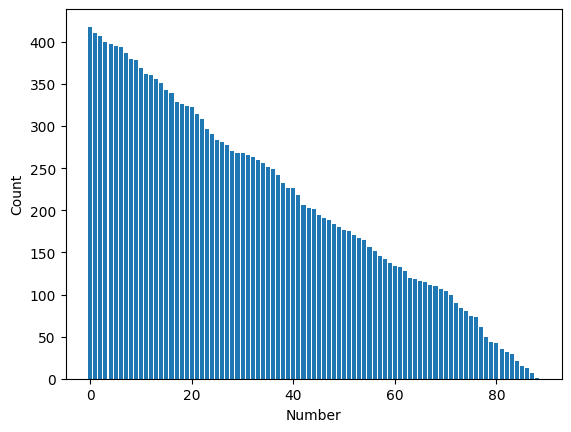

In [24]:
from collections import Counter

counter = Counter(RUL)
plt.bar(counter.keys(), counter.values())
plt.xlabel('Number')
plt.ylabel('Count')
plt.show()

# Creating train and test splits

In [25]:
X = df.drop(['date_diff'], axis=1).values

In [26]:
# .dt.days extracts the number of days from a dataframe column that contains datetime values
y = df['date_diff'].dt.days.values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train data features: {X_train.shape}, Train data labels: {y_train.shape}\n"
      f"Test data features: {X_test.shape}, Test data labels: {y_test.shape}")

Train data features: (14870, 30), Train data labels: (14870,)
Test data features: (3718, 30), Test data labels: (3718,)


# Using the Decision Tree Regressor from sklearn

### Testing out the printed tree

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\nsquared_error = 455.178\nsamples = 14870\nvalue = 29.58'),
 Text(0.25, 0.5, 'x[9] <= 369.0\nsquared_error = 444.977\nsamples = 14533\nvalue = 30.266'),
 Text(0.125, 0.16666666666666666, 'squared_error = 450.65\nsamples = 13212\nvalue = 31.425'),
 Text(0.375, 0.16666666666666666, 'squared_error = 240.299\nsamples = 1321\nvalue = 18.668'),
 Text(0.75, 0.5, 'x[21] <= 415.5\nsquared_error = 0.003\nsamples = 337\nvalue = 0.003'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.026\nsamples = 37\nvalue = 0.027'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.0\nsamples = 300\nvalue = 0.0')]

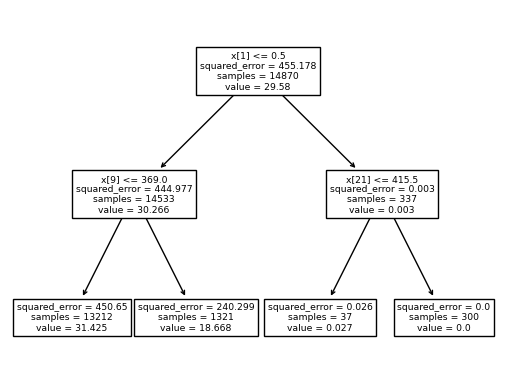

In [35]:
from sklearn import tree

DTR_sklearn = tree.DecisionTreeRegressor(max_depth=2, min_samples_split=2)
DTR_sklearn.fit(X_train, y_train)
tree.plot_tree(DTR_sklearn)

### Training the model with a reasonable depth

In [48]:
DTR_sklearn = tree.DecisionTreeRegressor(max_depth=100, min_samples_split=2)
DTR_sklearn.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=100)

In [49]:
y_pred_DTR_sklearn = DTR_sklearn.predict(X_test)

### Calculating the Root Mean Squared Error (RMSE)

In [50]:
from sklearn.metrics import root_mean_squared_error

rmse_DTR_sklearn = root_mean_squared_error(y_test, y_pred_DTR_sklearn)
print(f'Decision Tree Regressor RMSE: {rmse_DTR_sklearn}')

Decision Tree Regressor RMSE: 5.5099120912553605


### Calculating the R^2 score

In [51]:
score_DTR_sklearn = DTR_sklearn.score(X_test, y_test)
print(f'Decision Tree Regressor R^2 score: {score_DTR_sklearn}')

Decision Tree Regressor R^2 score: 0.9337137061073008


### Plotting actual vs predicted values

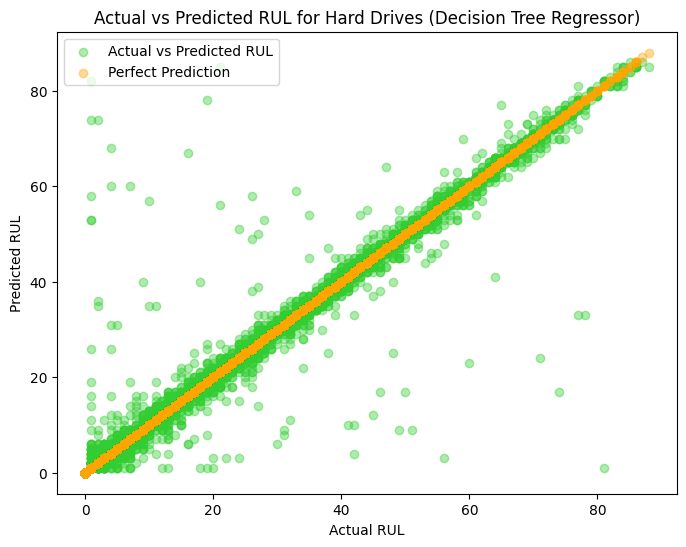

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DTR_sklearn, alpha=0.4, label='Actual vs Predicted RUL', color='limegreen')
plt.scatter(y_test, y_test, alpha=0.4, label='Perfect Prediction', color='orange')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL for Hard Drives (Decision Tree Regressor Sklearn)')
plt.legend(loc='upper left')
plt.show()

In [54]:
print(f'Minimum value: {min(y_pred_DTR_sklearn)}')
print(f'Mean: {np.mean(y_pred_DTR_sklearn)}')
print(f'Median: {np.median(y_pred_DTR_sklearn)}')
print(f'Standard Deviation: {np.std(y_pred_DTR_sklearn)}')
print(f'Maxiumum value: {max(y_pred_DTR_sklearn)}')

Minimum value: 0.0
Mean: 29.255110274341042
Median: 25.0
Standard Deviation: 21.378522537872204
Maxiumum value: 86.0


In [57]:
from collections import Counter

counter = Counter(y_pred_DTR_sklearn)
sorted_counts = sorted(counter.items(), key=lambda x: x[0])  # Sort the items by value in ascending order
values = []
counts = []

for value, count in sorted_counts:
    values.append(value)
    counts.append(count)
    
    
plt.figure(figsize=(12, 6))
plt.bar(values, counts, color='skyblue')
plt.xlabel('Predicted Values')
plt.ylabel('Count')
plt.title('Distribution of Predicted Values')
plt.show()

Value: 0.0, Count: 81
Value: 1.0, Count: 57
Value: 2.0, Count: 90
Value: 3.0, Count: 86
Value: 4.0, Count: 83
Value: 5.0, Count: 101
Value: 6.0, Count: 85
Value: 7.0, Count: 85
Value: 8.0, Count: 69
Value: 9.0, Count: 77
Value: 10.0, Count: 56
Value: 11.0, Count: 82
Value: 12.0, Count: 72
Value: 13.0, Count: 63
Value: 14.0, Count: 78
Value: 15.0, Count: 68
Value: 16.0, Count: 67
Value: 17.0, Count: 79
Value: 18.0, Count: 64
Value: 19.0, Count: 71
Value: 20.0, Count: 76
Value: 21.0, Count: 49
Value: 22.0, Count: 69
Value: 23.0, Count: 60
Value: 24.0, Count: 59
Value: 25.0, Count: 46
Value: 26.0, Count: 75
Value: 27.0, Count: 50
Value: 28.0, Count: 51
Value: 29.0, Count: 51
Value: 30.0, Count: 59
Value: 31.0, Count: 52
Value: 32.0, Count: 42
Value: 33.0, Count: 66
Value: 34.0, Count: 44
Value: 35.0, Count: 47
Value: 36.0, Count: 47
Value: 37.0, Count: 54
Value: 38.0, Count: 33
Value: 39.0, Count: 48
Value: 40.0, Count: 30
Value: 41.0, Count: 46
Value: 42.0, Count: 36
Value: 43.0, Count: 

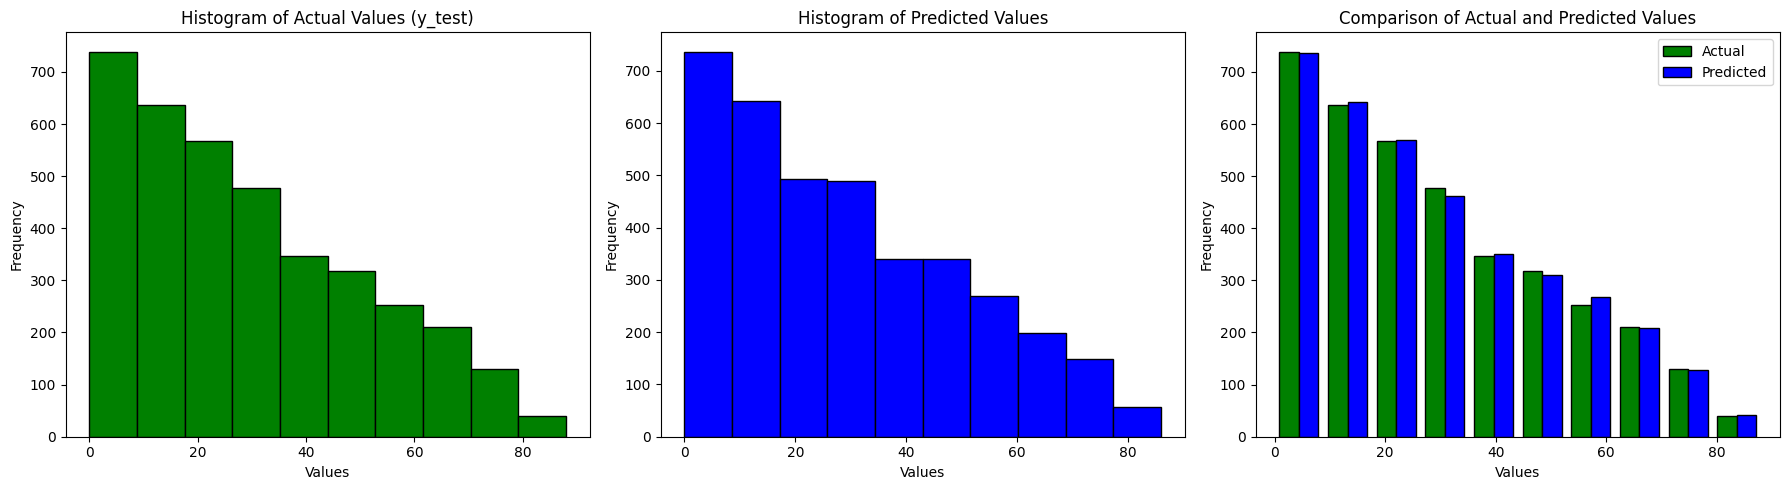

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot histogram for actual values
axs[0].hist(y_test, color='green', edgecolor='black')
axs[0].set_title('Histogram of Actual Values (y_test)')
axs[0].set_xlabel('Values')
axs[0].set_ylabel('Frequency')

# Plot histogram for predicted values
axs[1].hist(y_pred_DTR_sklearn, color='blue', edgecolor='black')
axs[1].set_title('Histogram of Predicted Values')
axs[1].set_xlabel('Values')
axs[1].set_ylabel('Frequency')

# Compare the two histograms
axs[2].hist([y_test, y_pred_DTR_sklearn], color=['green', 'blue'], edgecolor='black', label=['Actual', 'Predicted'])
axs[2].set_title('Comparison of Actual and Predicted Values')
axs[2].set_xlabel('Values')
axs[2].set_ylabel('Frequency')
axs[2].legend()

plt.tight_layout()
plt.show()

# Using Random Forest Regressor from sklearn

In [63]:
from sklearn.ensemble import RandomForestRegressor

model_RFR_sklearn = RandomForestRegressor(n_estimators=100, max_depth=100, min_samples_split=2)
model_RFR_sklearn.fit(X_train, y_train)
y_pred_RFR_sklearn = model_RFR_sklearn.predict(X_test)

### Calculating the RMSE

In [64]:
rmse_RFR_sklearn = root_mean_squared_error(y_test, y_pred_RFR_sklearn)
print(f'Random Forest Regressor RMSE: {rmse_RFR_sklearn}')

Random Forest Regressor RMSE: 3.152580927733208


### Calculating the R^2 score

In [65]:
score_RFR_sklearn = model_RFR_sklearn.score(X_test, y_test)
print(f'Random Forest Regressor R^2 score: {score_RFR_sklearn}')

Random Forest Regressor R^2 score: 0.978299642633268


### Plotting actual vs predicted values

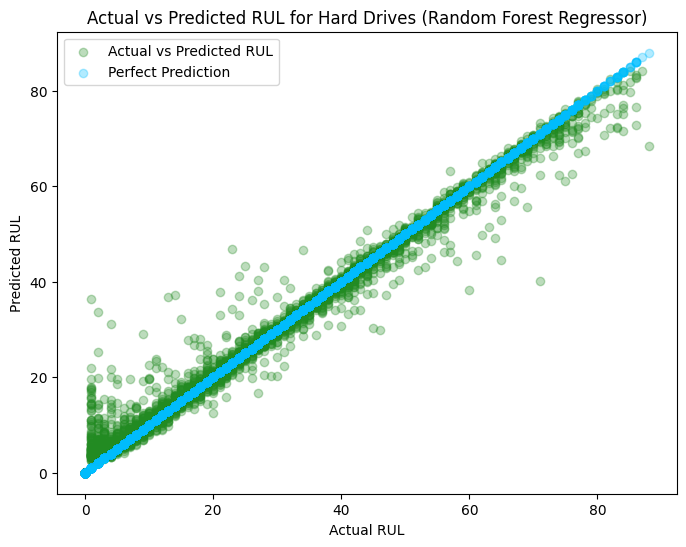

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RFR_sklearn, alpha=0.3, label='Actual vs Predicted RUL', color='forestgreen')
plt.scatter(y_test, y_test, alpha=0.3, label='Perfect Prediction', color='deepskyblue')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL for Hard Drives (Random Forest Regressor Sklearn)')
plt.legend()
plt.show()

### Implementing my own Decision Tree Regressor from scratch

In [89]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf(self):
        return self.value is not None


class MyDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.tree = None

    def fit(self, X, y):
        self.tree = self.grow_tree(X, y)

    def grow_tree(self, X, y, depth=0):
        num_samples, num_features = X.shape

        # 1. Stopping condition: either reached max depth or insufficient samples
        if depth == self.max_depth or num_samples < self.min_samples_split or num_features > self.max_features:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        # 2. Find the best split
        feature_index, threshold = self.best_split(X, y)

        # 3. Stopping conditions if no valid split found
        if feature_index is None:
            return Node(value=np.mean(y))
        # If a feature index exists but there is no threshold
        if threshold is None:
            return Node(value=np.mean(y))

        # 4. Create boolean arrays for left and right splits
        indices_left = X[:, feature_index] <= threshold
        indices_right = X[:, feature_index] > threshold
        
        # 5. Use the boolean arrays to create subsets of data for left and right splits
        X_left, y_left = X[indices_left], y[indices_left]
        X_right, y_right = X[indices_right], y[indices_right]

        # 6. Recursively grow left and right subtrees
        left_subtree = self.grow_tree(X_left, y_left, depth + 1)
        right_subtree = self.grow_tree(X_right, y_right, depth + 1)

        # 7. Create and return the current node
        return Node(feature_index=feature_index, threshold=threshold, left=left_subtree, right=right_subtree)

    def best_split(self, X, y):
        num_samples, num_features = X.shape

        # 1. Check if there is only one sample or fewer, cannot split
        if num_samples <= 1:
            return None, None  

        # 2. Calculate the variance of the entire dataset
        var_parent = np.var(y)
        
        # 3. Initialise variables
        best_var_reduction = 0
        best_split = None, None
        column_indices = list(range(num_features))
        
        # Adding feature selection for Random Forest
        if self.max_features:  # If we have set a value for the max num of features
            if self.max_features >= len(column_indices):
                warnings.warn('max_features is set greater than the number of columns. Continuing without max_features.')
                # print('Warning: max_features is set greater than the number of columns. Continuing without max_features.')
            else:
                column_indices = np.random.choice(a=num_features, size=self.max_features, replace=False)
        
        # 4. Loop through each feature/column
        for feature_index in column_indices:
            # Get the unique values in the current feature
            thresholds = np.unique(X[:, feature_index])
            
            # 5. Loop through each unique value as a potential threshold
            for threshold in thresholds:
                # Create boolean arrays for the left and right splits
                indices_left = X[:, feature_index] <= threshold
                indices_right = X[:, feature_index] > threshold
                
                # Filter y to get the left and right subsets
                y_left = y[indices_left]  # keeps only the elements where indices_left is True
                y_right = y[indices_right]  # keeps only the elements where indices_right is True

                # 6. Skip the split if either side has too few samples
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue

                # 7. Calculate the weighted variance of the child nodes
                weighted_var_child = ((len(y_left) / num_samples) * np.var(y_left) +
                                      (len(y_right) / num_samples) * np.var(y_right))

                # Calculate the variance reduction
                var_reduction = var_parent - weighted_var_child

                # 8. Update the best split if the variance reduction is higher
                if var_reduction > best_var_reduction:
                    best_var_reduction = var_reduction
                    best_split = (feature_index, threshold)
        
        return best_split

    def print_tree(self, node=None, indent='  '):
        if node is None:
            node = self.tree

        if node.is_leaf():
            # print(node.value)
            print(f'{node.value:.4f}')
        else:
            print(f'X{node.feature_index} <= {node.threshold}')

            print(f'{indent}Left: ', end='')
            self.print_tree(node.left, indent + '  ')

            print(f'{indent}Right: ', end='')
            self.print_tree(node.right, indent + '  ')


    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])

    def traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value

        if x[node.feature_index] <= node.threshold:
            return self.traverse_tree(x, node.left)
        return self.traverse_tree(x, node.right)

### Testing the print tree function

In [90]:
DTR = MyDecisionTreeRegressor(max_depth=2, min_samples_split=2)
DTR.fit(X_train, y_train)
DTR.print_tree()

X1 <= 0.0
  Left: X9 <= 368.0
    Left: 31.4254
    Right: 18.6684
  Right: X21 <= 414.0
    Left: 0.0270
    Right: 0.0000


### Training the model with a reasonable depth

In [77]:
DTR = MyDecisionTreeRegressor(max_depth=100, min_samples_split=2)
DTR.fit(X_train, y_train)

In [78]:
y_pred_DTR = DTR.predict(X_test)

In [80]:
rmse_DTR = root_mean_squared_error(y_test, y_pred_DTR)
print(f'Decision Tree Regressor RMSE: {rmse_DTR}')

Decision Tree Regressor RMSE: 6.065767425231205


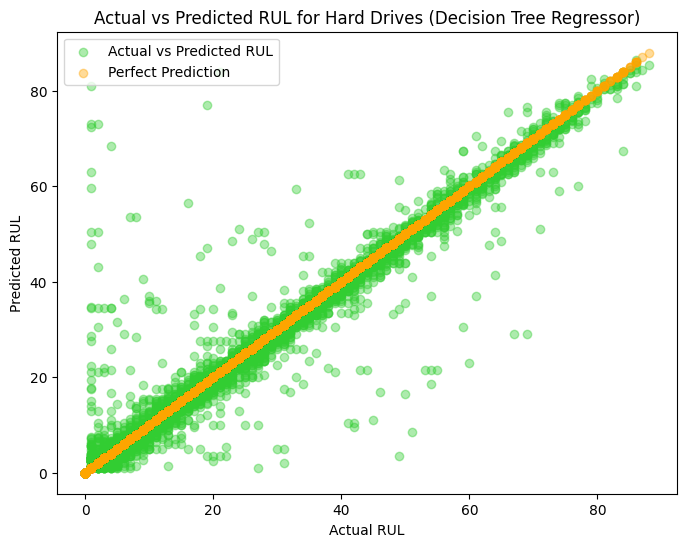

In [83]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_DTR, alpha=0.4, label='Actual vs Predicted RUL', color='limegreen')
plt.scatter(y_test, y_test, alpha=0.4, label='Perfect Prediction', color='orange')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL for Hard Drives (Decision Tree Regressor)')
plt.legend(loc='upper left')
plt.show()

### Implementing my own Random Forest Regressor from scratch

In [84]:
class RandomForestRegressor:
    def __init__(self, n_trees=100, max_depth=None, min_samples_split=2, max_features=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []  # List to store individual decision trees
        
    def fit(self, X, y):
        for _ in range(self.n_trees):
            # Perform bootstrap sampling (pick random values from the X_train samples)
            bootstrap_indices = np.random.choice(len(X), len(X), replace=True)
            # Create a new dataset using the bootstrap indices
            X_bootstrap, y_bootstrap = X[bootstrap_indices], y[bootstrap_indices]
            
            tree = MyDecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split, max_features=self.max_features)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)
    
    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])  # 2D array where each row corresponds to the predictions from a different tree in the ensemble
        predictions = np.mean(predictions, exis=0)  # Calculating the mean along each column of each row
        return predictions

In [85]:
RFR = RandomForestRegressor(n_trees=100, max_depth=100, min_samples_split=2)
RFR.fit(X_train, y_train)

In [86]:
y_pred_RFR = RFR.predict(X_test)

In [87]:
rmse_RFR = root_mean_squared_error(y_test, y_pred_RFR)
print(f'Decision Tree Regressor RMSE: {rmse_RFR}')

Decision Tree Regressor RMSE: 3.9908842942143057


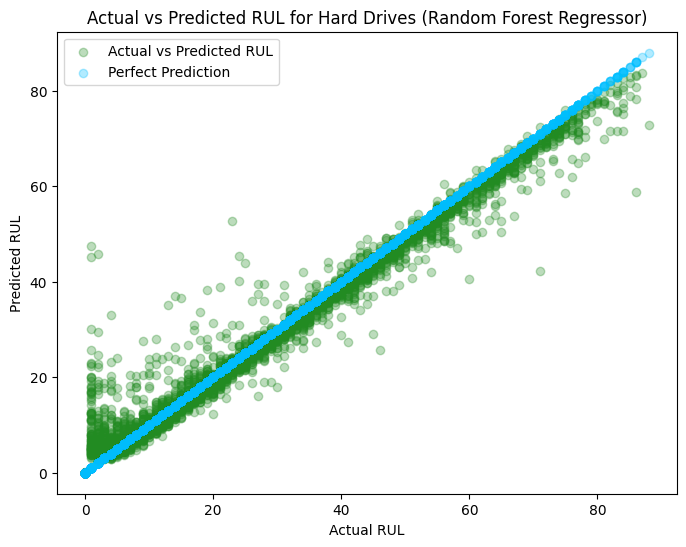

In [88]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RFR, alpha=0.3, label='Actual vs Predicted RUL', color='forestgreen')
plt.scatter(y_test, y_test, alpha=0.3, label='Perfect Prediction', color='deepskyblue')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL for Hard Drives (Random Forest Regressor)')
plt.legend()
plt.show()